# Case Study 1: Sales Analysis
# Problem Statement:
# You have a dataset containing sales data with information like product ID, sales quantity, and revenue. 

# Perform the following tasks:

# Load the dataset and inspect its structure.
# Clean the data (handle missing values, duplicates, etc.).
# Calculate total revenue and quantity sold for each product.
# Find the top-selling products.
# Analyze monthly sales trends.

In [1]:
sales_data = {
    "Date": ['2024-01-01', '2024-01-02', '2024-02-01', '2024-02-02', '2024-03-01','2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05'],
    "product_ID": [101, 102, 107, 104, 102, 106, 101, 108, 109, 107],
    "sales_quantity": [50, 75, 120, 90, 60, 80, 10, 95, 70,100],
    "revenue": [2500.00, 3750.00, 6000.00, 4500.00, 3000.00, 4000.00, 5500.00, 4750.00, 3500.00, 5000.00]
}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.DataFrame(sales_data)
df

,Date,product_ID,sales_quantity,revenue
0,2024-01-01,101,50,2500.0
1,2024-01-02,102,75,3750.0
2,2024-02-01,107,120,6000.0
3,2024-02-02,104,90,4500.0
4,2024-03-01,102,60,3000.0
5,2024-01-01,106,80,4000.0
6,2024-01-02,101,10,5500.0
7,2024-01-03,108,95,4750.0
8,2024-01-04,109,70,3500.0
9,2024-01-05,107,100,5000.0


In [4]:
df.isnull().sum()

Date              0
product_ID        0
sales_quantity    0
revenue           0
dtype: int64

In [5]:
df = df.dropna()
df

,Date,product_ID,sales_quantity,revenue
0,2024-01-01,101,50,2500.0
1,2024-01-02,102,75,3750.0
2,2024-02-01,107,120,6000.0
3,2024-02-02,104,90,4500.0
4,2024-03-01,102,60,3000.0
5,2024-01-01,106,80,4000.0
6,2024-01-02,101,10,5500.0
7,2024-01-03,108,95,4750.0
8,2024-01-04,109,70,3500.0
9,2024-01-05,107,100,5000.0


In [6]:
total_revenue_for_each_product = df.groupby(['product_ID'])['revenue'].sum().reset_index(name="Total_revenue_of_each_Product")
total_revenue_for_each_product

,product_ID,Total_revenue_of_each_Product
0,101,8000.0
1,102,6750.0
2,104,4500.0
3,106,4000.0
4,107,11000.0
5,108,4750.0
6,109,3500.0


In [7]:
quantity_sold_for_each_product = df.groupby(['product_ID'])['sales_quantity'].sum().reset_index(name="sales_quantity_of_Each_Product")
quantity_sold_for_each_product


,product_ID,sales_quantity_of_Each_Product
0,101,60
1,102,135
2,104,90
3,106,80
4,107,220
5,108,95
6,109,70


In [8]:
top_selling_product = quantity_sold_for_each_product.sort_values(by ='sales_quantity_of_Each_Product').tail(1)
print("The Top selling product is::",top_selling_product['product_ID'])

The Top selling product is:: 4    107
Name: product_ID, dtype: int64


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

In [10]:
c = df['month'].value_counts()
c

month
1    7
2    2
3    1
Name: count, dtype: int64

<Axes: title={'center': 'Monthly Entries'}, xlabel='Month', ylabel='Number of Entries'>

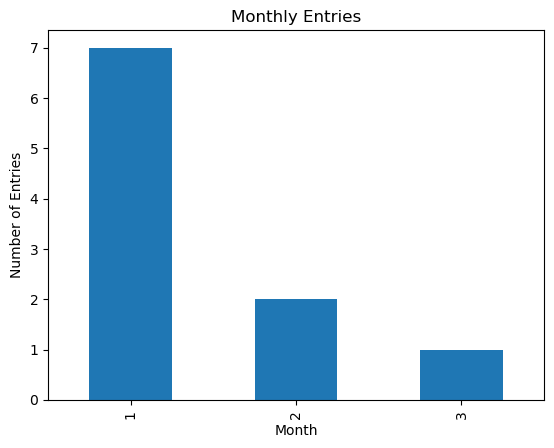

In [13]:
c.plot(kind='bar', xlabel='Month', ylabel='Number of Entries', title='Monthly Entries')